In [ ]:
#Importing all the necessary packages
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Loading the dataset from an Excel file
df = pd.read_excel('/Users/anastasiaponomarenko/Desktop/AML/superstore_final_dataset-_1_-copy.xlsx')


In [ ]:
print(df.head(5))

   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   
4    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   

   Postal_Code Region       Product_ID         Cat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.describe()

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
# Checking the shape of the DataFrame (number of rows, number of columns)
shape = df.shape

# Print the result
print(f'N rows: {shape[0]}')
print(f'N columns: {shape[1]}')


N rows: 9800
N columns: 18


In [ ]:
# Handling missing values (if any)
df.dropna(inplace=True)

# Checking for and handling duplicates (if any)
df.drop_duplicates(inplace=True)


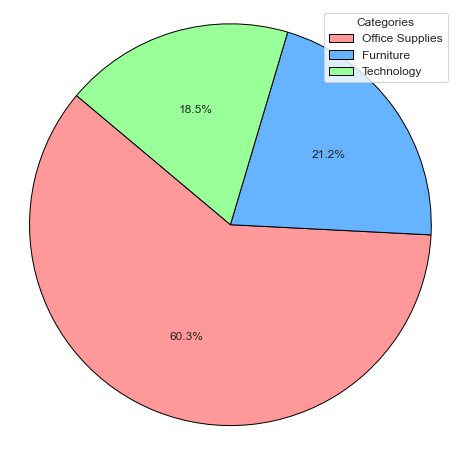

In [ ]:


# Counting each category
category_counts = df['Category'].value_counts()

# Picking customed colorous from the colour palette
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Creating a pie chart which is the best figure to represent the split in categories
plt.figure(figsize=(8, 8))
plt.pie(
    category_counts,
    labels=None,  # Removing category labels from the chart as I already use the legend for a better readability
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},  # Adding black edges lines for a clearer separation
    textprops={'fontsize': 12}  # Increasing label font size for Power Point presentation
)

# Equaling aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Adding a legend
plt.legend(category_counts.index, title='Categories', loc='upper right', fontsize=12)

# Displaying the chart
plt.show()


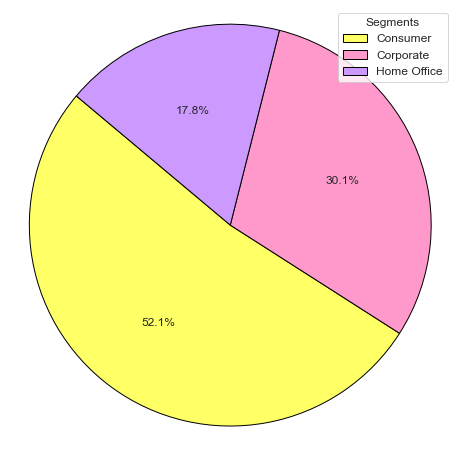

In [ ]:
# same as above
category_counts = df['Segment'].value_counts()

# choosing custom colors for the pie slices (yellow, pink, and violet)
colors = ['#ffff66', '#ff99cc', '#cc99ff']

# pie chart as explained above
plt.figure(figsize=(8, 8))
plt.pie(
    category_counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12}
)


# Equaling aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Adding a legend
plt.legend(category_counts.index, title='Segments', loc='upper right', fontsize=12)

# Displaying the chart
plt.show()


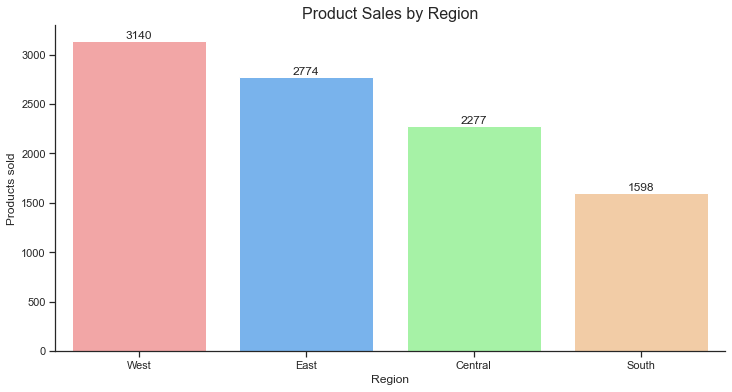

In [ ]:
# removing grids
sns.set_style("ticks")

# Calculating the n of each category
category_counts = df['Region'].value_counts()

# Defining custom colors for the bar chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

# Creating a bar chart of the 'Category' column with quantity on the x-axis
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Region', order=category_counts.index, palette=colors)
plt.xlabel('Region')
plt.ylabel("Products sold")

# Adding quantity labels to the top of the bars
for p, label in zip(ax.patches, category_counts):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Adding a title
plt.title('Product Sales by Region', fontsize=16)

# Removing the top and right spines for better aesthetics
sns.despine(top=True, right=True)

plt.show()


In [ ]:
df.head(5)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [ ]:
#Fixing column types and creating a month column because they correspond to similar weather/traffic etc factors depending on a repeating time series
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d/%m/%Y")
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format="%d/%m/%Y")
df['Ship_Month'] = df['Ship_Date'].dt.month

In [ ]:
df.drop('Row_ID', axis=1, inplace=True)

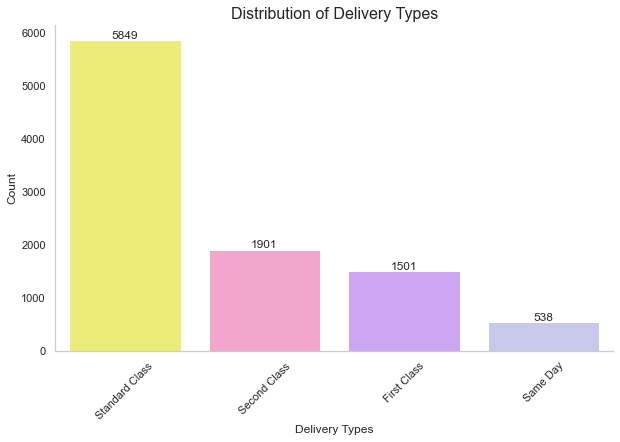

In [ ]:

# Calculating the n each category
category_counts = df['Ship_Mode'].value_counts()

# picking colours
colors = ['#ffff66', '#ff99cc', '#cc99ff','#c2c2f0']

# Setting a whitegrid
sns.set(style="whitegrid")

# Creating a bar plot with features
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_counts.index, y=category_counts, palette=colors)
plt.xlabel('Delivery Types')
plt.ylabel('Count')
plt.title('Distribution of Delivery Types', fontsize=16)

# Adding data labels above the bars
for p, label in zip(ax.patches, category_counts):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Rotating x-axis labels for readability for Power Point presentation
plt.xticks(rotation=45)

# Remove grid lines from the plot
ax.yaxis.grid(False)

# Remove the top and right spines for better aesthetics
sns.despine(top=True, right=True)

plt.show()


In [ ]:
# Adding a new tow for prediction of delivery time in days
df['Delivery_Time(In Days)'] = df.apply(lambda row: (row['Ship_Date'] - row['Order_Date']).days, axis=1) #Calculating the delivery time

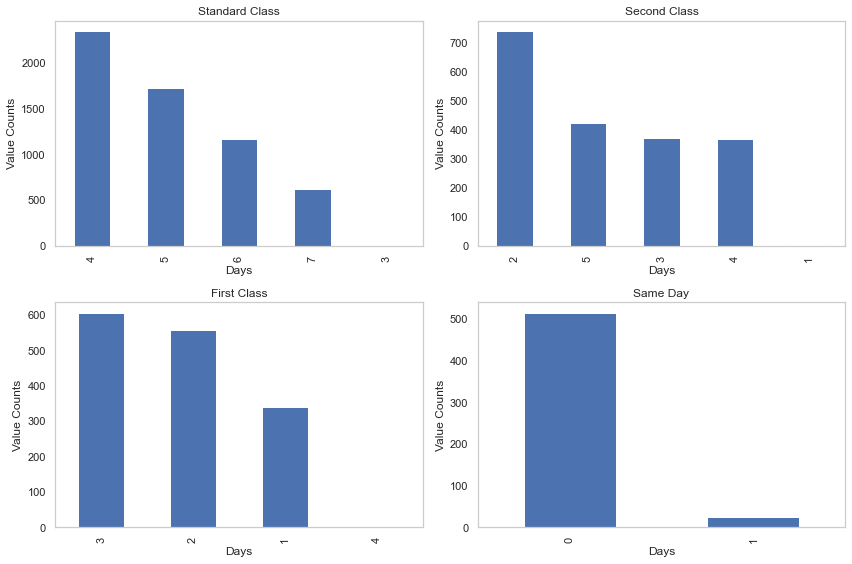

In [ ]:
#Inspecting the delivery time for each delivery modes

# Creating DataFrames for each delivery mode
standard_class = df[df['Ship_Mode'] == 'Standard Class']
second_class = df[df['Ship_Mode'] == 'Second Class']
first_class = df[df['Ship_Mode'] == 'First Class']
same_day = df[df['Ship_Mode'] == 'Same Day']

# Creating a subplot with 2x2 grid
plt.figure(figsize=(12, 8))

# Subplot 1: Standard Class
plt.subplot(2, 2, 1)
standard_class['Delivery_Time(In Days)'].value_counts().plot(kind='bar', grid=False)
plt.title('Standard Class')
plt.xlabel('Days')
plt.ylabel('Value Counts')

# Subplot 2: Second Class
plt.subplot(2, 2, 2)
second_class['Delivery_Time(In Days)'].value_counts().plot(kind='bar', grid=False)
plt.title('Second Class')
plt.xlabel('Days')
plt.ylabel('Value Counts')

# Subplot 3: First Class
plt.subplot(2, 2, 3)
first_class['Delivery_Time(In Days)'].value_counts().plot(kind='bar', grid=False)
plt.title('First Class')
plt.xlabel('Days')
plt.ylabel('Value Counts')

# Subplot 4: Same Day
plt.subplot(2, 2, 4)
same_day['Delivery_Time(In Days)'].value_counts().plot(kind='bar', grid=False)
plt.title('Same Day')
plt.xlabel('Days')
plt.ylabel('Value Counts')

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()


In [ ]:
#Dropping unnecessary columns,
df.drop('Order_Date', axis=1, inplace=True) #Dropped, because we have extracted the delivery month
df.drop('Ship_Date', axis=1, inplace=True) #Dropped for the same reason on order date
df.drop('Customer_Name', axis=1, inplace=True) #Dropped because it adds no value in can be repeating for different instances, customer id however is uniqe
df.drop('Country', axis=1, inplace=True) #Dropped because it is same throughout the dataset
df.drop('Order_ID', axis=1, inplace=True) #Dropped because it does not bear any importance for prediction as unique for each order
df.drop('Postal_Code', axis=1, inplace=True) #Dropped because it makes the dataset unnecessarily large while having same information in other location columns
df.drop('Product_Name', axis=1, inplace=True) #Dropped because product_id is a better choice for keeping product informations, product name has the same information while having chances of misspelling

In [ ]:
df.head(5) #looking how the data looks like after all the column dropping.

,Ship_Mode,Customer_ID,Segment,City,State,Region,Product_ID,Category,Sub_Category,Sales,Ship_Month,Delivery_Time(In Days)
0,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,11,3
1,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,731.9400,11,3
2,Second Class,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,6,4
3,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,957.5775,10,7
4,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,10,7


In [ ]:
# Separating categorical columns and non-categorical columns
categorical_cols_customer = ['Customer_ID', 'Segment']
categorical_cols_location = ['City', 'State', 'Region']
categorical_cols_product = ['Product_ID', 'Category', 'Sub_Category']
non_categorical_cols = ['Sales', 'Ship_Mode', 'Ship_Month']


# Initializing the label encoder for the only column that represents ordinality
label_encoder = LabelEncoder()
df['Ship_Mode'] = label_encoder.fit_transform(df['Ship_Mode'])

In [ ]:
#We need to encode the non categorical columns since there are lot of uniqe row values, after encoding the dataframe will be awfully large. We will then do PCA to shorten them.

In [ ]:
# Performing one-hot encoding for each non ordinal categorical columns
# Initializing separate encoders for each set of categorical columns
encoder_customer = OneHotEncoder(sparse=False, drop='first')
encoder_location = OneHotEncoder(sparse=False, drop='first')
encoder_product = OneHotEncoder(sparse=False, drop='first')

# Fiting and transforming each encoder separately
encoded_customer = encoder_customer.fit_transform(df[categorical_cols_customer])
encoded_location = encoder_location.fit_transform(df[categorical_cols_location])
encoded_product = encoder_product.fit_transform(df[categorical_cols_product])

# Creating DataFrames with appropriate column names
encoded_customer_df = pd.DataFrame(encoded_customer, columns=encoder_customer.get_feature_names_out(categorical_cols_customer))
encoded_location_df = pd.DataFrame(encoded_location, columns=encoder_location.get_feature_names_out(categorical_cols_location))
encoded_product_df = pd.DataFrame(encoded_product, columns=encoder_product.get_feature_names_out(categorical_cols_product))


# Standardizing non-categorical columns
scaler = StandardScaler()
scaled_non_categorical = scaler.fit_transform(df[non_categorical_cols])
scaled_non_categorical_df = pd.DataFrame(scaled_non_categorical, columns=non_categorical_cols)

# Performing PCA on categorical columns for 'customer_details'
n_components_customer_details = 10
pca_customer_details = PCA(n_components=n_components_customer_details)
pca_customer_details_result = pca_customer_details.fit_transform(encoded_customer_df)

# Performing PCA on categorical columns for 'location_details'
n_components_location_details = 10
pca_location_details = PCA(n_components=n_components_location_details)
pca_location_details_result = pca_location_details.fit_transform(encoded_location_df)

# Performing PCA on categorical columns for 'product_details'
n_components_product_details = 10
pca_product_details = PCA(n_components=n_components_product_details)
pca_product_details_result = pca_product_details.fit_transform(encoded_product_df)

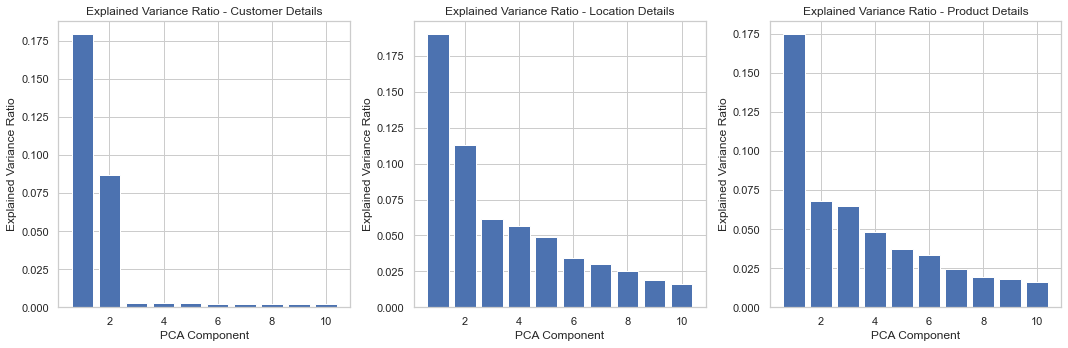

In [ ]:
# Calculating explained variance ratio for each PCA component
explained_variance_customer = pca_customer_details.explained_variance_ratio_
explained_variance_location = pca_location_details.explained_variance_ratio_
explained_variance_product = pca_product_details.explained_variance_ratio_

# Creating three separate plots to understand the principle components better
plt.figure(figsize=(15, 5))

# Plot for 'customer_details'
plt.subplot(1, 3, 1)
plt.bar(range(1, n_components_customer_details + 1), explained_variance_customer)
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio - Customer Details')

# Plot for 'location_details'
plt.subplot(1, 3, 2)
plt.bar(range(1, n_components_location_details + 1), explained_variance_location)
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio - Location Details')

# Plot for 'product_details'
plt.subplot(1, 3, 3)
plt.bar(range(1, n_components_product_details + 1), explained_variance_product)
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio - Product Details')

plt.tight_layout()
plt.show()

In [ ]:
# Defining the number of components to keep for each PCA result
customer_details_components = 2 #Because of the leading 2 PC's in the first graph
location_details_components = 2 #Because of the leading 2 PC's in the first graph
product_details_components = 1 #Because of the leading 1 PC in the first graph

# Slicing the PCA results to keep the desired number of components
pca_customer_details_result_selected = pca_customer_details_result[:, :customer_details_components]
pca_location_details_result_selected = pca_location_details_result[:, :location_details_components]
pca_product_details_result_selected = pca_product_details_result[:, :product_details_components]

# Creating the DataFrame with the selected components and non-categorical columns
df_pca = pd.DataFrame({
    'customer_details_PC{}'.format(i+1): pca_customer_details_result_selected[:, i]
    for i in range(customer_details_components)
})

df_pca['sales'] = scaled_non_categorical_df['Sales']
df_pca['Month'] = scaled_non_categorical_df['Ship_Month']
df_pca['Ship_Mode'] = scaled_non_categorical_df['Ship_Mode']

# Adding the selected components from location_details_PC
for i in range(location_details_components):
    df_pca['location_details_PC{}'.format(i+1)] = pca_location_details_result_selected[:, i]

# Adding the selected components from product_details_PC
for i in range(product_details_components):
    df_pca['product_details_PC{}'.format(i+1)] = pca_product_details_result_selected[:, i]

In [ ]:
df_pca.head() #looking into the all numerical dataframe, such a beauty!

,customer_details_PC1,customer_details_PC2,sales,Month,Ship_Mode,location_details_PC1,location_details_PC2,product_details_PC1
0,-0.173638,-0.302929,0.050928,0.972917,-0.214419,-0.164136,0.830879,0.426239
1,-0.173638,-0.302929,0.802571,0.972917,-0.214419,-0.164136,0.830879,0.478117
2,0.696085,0.190358,-0.344645,-0.526813,-0.214419,1.147586,-0.459849,-0.385574
3,-0.174374,-0.305597,1.163435,0.672971,0.694608,-0.172550,0.904584,0.437583
4,-0.174374,-0.305597,-0.332254,0.672971,0.694608,-0.172550,0.904584,-0.446906


In [ ]:
df_pca['Delivery_Time(In Days)']=df['Delivery_Time(In Days)'] #adding the column we want to predict

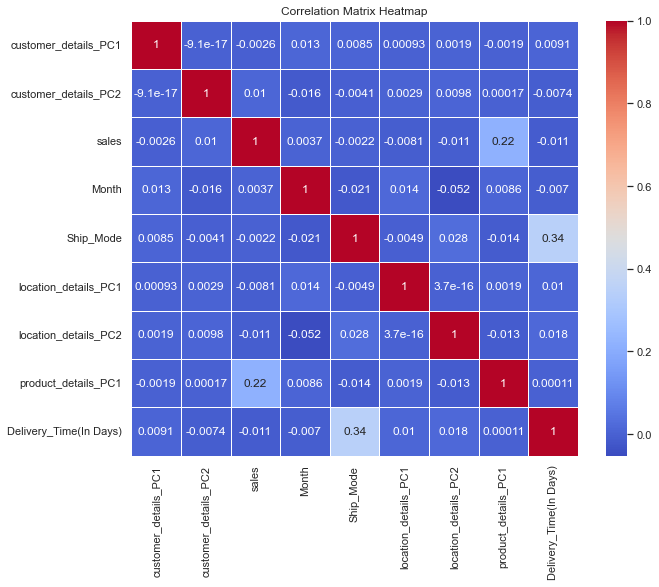

In [ ]:
#creating a correlation matrix to see how the correlation is distributed
correlation_matrix = df_pca.corr()

#Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
#It can be observed that we have stronger correlations with ship_mode and delivery time, and we also have some correlation with product details pc2 and sales which are pretty obvious

In [ ]:
#Splitting the data into training and test sets
X = df_pca.drop(columns=['Delivery_Time(In Days)'])
Y= df['Delivery_Time(In Days)']

In [ ]:
from sklearn.linear_model import Ridge # Trying to fit a Linear Regression Model with optimization parameters


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Ridge regression model with gradient descent optimization
alpha = 0.9  # Regularization strength (adjust as needed)
max_iter = 300000  # Maximum number of iterations (adjust as needed)
model = Ridge(alpha=alpha, max_iter=max_iter, solver='saga')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error (MSE): 1.454678226249455
Root Mean Squared Error (RMSE): 1.206100421295613
R-squared (R2): 0.5260656957289334
Coefficients: [ 7.49666602e-02 -1.91753582e-02 -1.12428662e-02  1.20235750e-03
  1.26407085e+00 -8.61025728e-04 -3.40597174e-02 -9.50871533e-03]
Intercept: 3.960692814242547


In [ ]:
#After having tried many different parameters, the errors keeps moving around the same number. Hence we can try a model method to see if if we can beat this accuacy

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # Trying to fit a Random Forest Model

#taking only positive correlations as variables:(After taking the other metrics this one came out the best in terms of accuracy)
X= df_pca[['Ship_Mode','customer_details_PC1','customer_details_PC2','location_details_PC2']]
Y= df['Delivery_Time(In Days)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


Y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 0.5135033664826253
Mean Squared Error (MSE): 0.6097730853812041
R-squared (R²): 0.8013358708692152


In [ ]:
#The error has been successfully narrowed down below a single day. Therefore now we have a good predictive power over our deliveries. Time to put this in action.